In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Random

In [2]:
def create_df(size: int, set_types: bool = False):
    dates = pd.date_range('2020-01-01','2022-12-31')

    df = pd.DataFrame()
    df['x'] = np.random.randint(0,100, size=size)
    df['y'] = np.random.randint(0,100, size=size)
    df['value'] = np.random.normal(100,10, size=size)
    df['color'] = np.random.choice(['red','green','blue','yellow'], size=size)
    df['s'] = np.random.choice(['Yes', 'No'], size=size)
    df['date'] = np.random.choice(dates, size=size)

    if set_types:
        df['x'] = df['x'].astype('int8')
        df['y'] = df['y'].astype('int8')
        df['value'] = df['value'].astype('float32')
        df['color'] = df['color'].astype('category')
        df['s'] = df['s'].map({'Yes':True, 'No':False})
    return df

In [3]:
df = create_df(size=10_000_000, set_types=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   x       int8          
 1   y       int8          
 2   value   float32       
 3   color   category      
 4   s       bool          
 5   date    datetime64[ns]
dtypes: bool(1), category(1), datetime64[ns](1), float32(1), int8(2)
memory usage: 152.6 MB


<AxesSubplot:xlabel='x', ylabel='y'>

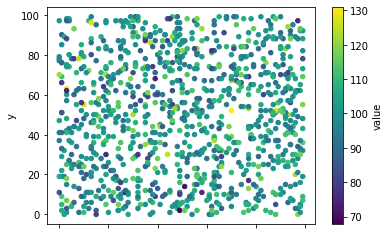

In [4]:
mini_sample = df.sample(n=1_000).copy()
mini_sample.plot.scatter(x='x',y='y',c='value',colormap='viridis')

## Stocks

In [5]:
def create_stock_df(from_date: str, to_date: str):
    dates = pd.date_range(from_date, to_date)
    size = len(dates)

    df = pd.DataFrame()
    df['dates'] = dates

    # price
    # daily change
    pos = np.random.normal(loc=0.01, scale=0.01, size=size)
    neg = np.random.exponential(scale=0.00985, size=size)
    daily_change = pos-neg + 1
    df['daily_change'] = daily_change

    start_value = 1
    daily_change[0] = start_value
    df['value'] = np.cumprod(daily_change) * 100

    return df

<AxesSubplot:>

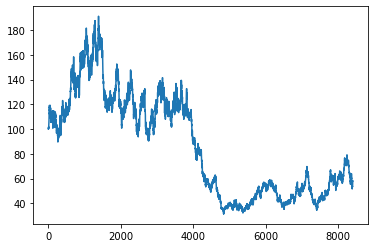

In [6]:
alph = create_stock_df('2000-01-01','2022-12-31')
alph['value'].plot()

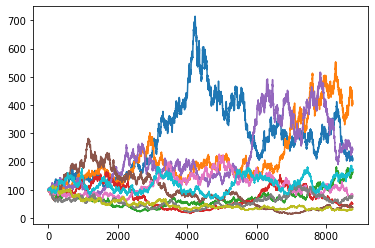

In [7]:
for _ in range(10):
    a = create_stock_df('1999-01-01','2022-12-31')
    a['value'].plot()

## Random walk

In [8]:
def random_walk_xy(size: int):
    x_diff = np.random.randint(-3,4,size)
    y_diff = np.random.randint(-3,4,size)

    x = np.cumsum(x_diff)
    y = np.cumsum(y_diff)

    plt.title(f"Random Walk of {size} steps")
    plt.plot(x, y)
    plt.show()

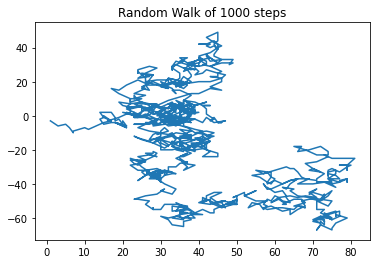

In [9]:
random_walk_xy(1_000)

## People dataset

In [10]:
male_names = ['Adam', 'Bert', 'Charles', 'Donald', 'Eric', 'Falk', 'George', 'Mario', 'Brian', 'Steve']
female_names = ['Ada', 'Bella', 'Cloe', 'Donna', 'Erica', 'Franseca', 'Gudrun', 'Maria', 'Penelope']
middle_names = ['A.', 'B.', 'C.', 'D.', 'E.', 'F.', 'G.', 'Von', 'P.']
last_names = ['Abrahamsen', 'Bohus', 'Cohoon', 'Derks', 'Emm', 'Fulham', 'Grandios', 'Pellegrino', 'Wu', 'Djiik']
# [GDP per capita, Variance, ...]
nationalities = {'Norwegian' : [75, 5], 
                'British' : [65, 25], 
                'German' : [50, 15], 
                'French' : [60, 18], 
                'American' : [80, 50], 
                'Spanish' : [30, 10], 
                'Italian' : [40, 12], 
                'Dutch' : [80, 15],
                'Swiss' : [135, 25]}

In [11]:
def get_random_income(nationality):
    mean, std = nationalities[nationality]
    return np.random.normal(mean, std)

def get_people_df(size: int):
    dates = pd.date_range('1945-01-01','2002-12-31')

    df = pd.DataFrame()
    genders = np.random.choice(['male','female'], size=size)
    df['gender'] = genders

    males = np.random.choice(male_names, size=size)
    females = np.random.choice(female_names, size=size)
    is_male = genders == 'male'

    df['first_name'] = np.where(is_male, males, females)
    df['middle_name'] = np.random.choice(middle_names, size=size)
    df['last_name'] = np.random.choice(last_names, size=size)
    nationality = np.random.choice(list(nationalities.keys()), size=size)
    df['nationality'] = nationality
    df['birth_day'] = np.random.choice(dates, size=size)
    df['age'] = (pd.to_datetime(datetime.date.today()) - df['birth_day']) / pd.Timedelta('365.25 days')

    df['income_raw'] = df.apply(lambda row: get_random_income(row['nationality']), axis=1)
    df['income_raw'] = df['income_raw'].clip(0) * 1_000
    df['income'] = df['income_raw'].apply(lambda x: "${:.1f}k".format((x/1000)))

    # Set types
    df['first_name'] = df['first_name'].astype('category')
    df['middle_name'] = df['middle_name'].astype('category')
    df['last_name'] = df['last_name'].astype('category')
    df['nationality'] = df['nationality'].astype('category')
    df['age'] = df['age'].astype('int8')
    return df

In [28]:
people_df = get_people_df(10_000)
people_df.head()

,gender,first_name,middle_name,last_name,nationality,birth_day,age,income_raw,income
0,male,Bert,G.,Djiik,German,2000-02-07,22,74105.241754,$74.1k
1,female,Penelope,Von,Pellegrino,British,1963-03-10,59,41812.241441,$41.8k
2,male,Donald,A.,Djiik,Norwegian,1949-10-10,73,71933.772242,$71.9k
3,female,Maria,A.,Fulham,American,1960-01-08,62,117509.634350,$117.5k
4,male,Steve,B.,Abrahamsen,Swiss,1945-02-17,77,190441.658426,$190.4k


income_raw    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

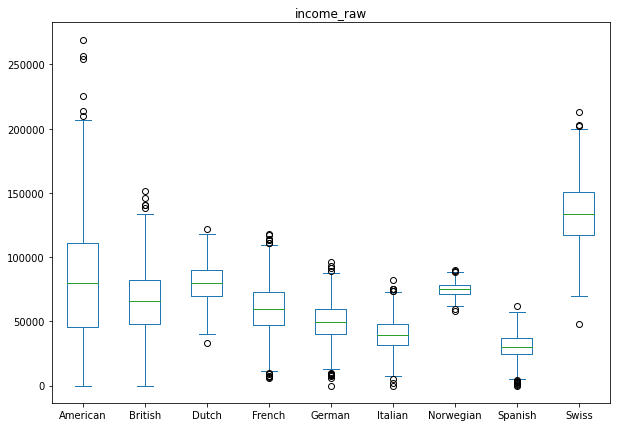

In [29]:
people_df[['nationality','income_raw']].plot.box(by='nationality', figsize=(10,7))